In [29]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3
from konlpy.tag import Kkma
kkma=Kkma()

In [2]:
import nltk
from nltk.tokenize import word_tokenize,WhitespaceTokenizer, WordPunctTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kpd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
dbname='wadiz.db'
def getData(cols='*',whr='',tblname='wadiztable'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select '+ cols+' from '+tblname+' '+whr
        data=cur.execute(sql).fetchall()
    return data

res=getData('ncontent')

In [27]:
def tknWord(txt):
    kpos=kkma.pos(txt)
    cate=['NNG','NNP','NNB','VV','VA','VCP','VCN','MAG','MAC']
    tkn=[]
    for k in kpos:
        if(k[1] in cate):
            if (len(k[0])>1):
                tkn.append(k[0])
    return tkn

In [54]:
def makeTxta(rn):
    txta=[]
    for res in rn:
        txta.append(tknWord(res))
    txtall=''
    for txt in txta:
        txtall+=' '.join(txt)
    return txtall

In [64]:
wadiztxtall=[]
for i in range(3):
    wadiztxtall.append(makeTxta(res[i]))

In [33]:
from wordcloud import WordCloud
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
font_path="C:\Windows\Fonts\malgun.ttf" # dir로 영어이름 찾기
font=font_manager.FontProperties(fname=font_path).get_name()
print(font)
rc('font',family=font)

Malgun Gothic


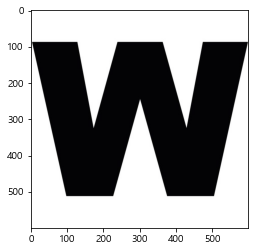

In [35]:
#!pip install Pillow
from PIL import Image
img=Image.open('./img/W.jpg')
mask=np.array(img)
plt.imshow(mask)

In [69]:
WC0=WordCloud(font_path=font_path, background_color='white',height=500, width=500,max_words=100,mask=mask).generate(wadiztxtall[0])
WC1=WordCloud(font_path=font_path, background_color='white',height=500, width=500,max_words=100,mask=mask).generate(wadiztxtall[1])
WC2=WordCloud(font_path=font_path, background_color='white',height=500, width=500,max_words=100,mask=mask).generate(wadiztxtall[2])

wordcloud.wordcloud.WordCloud

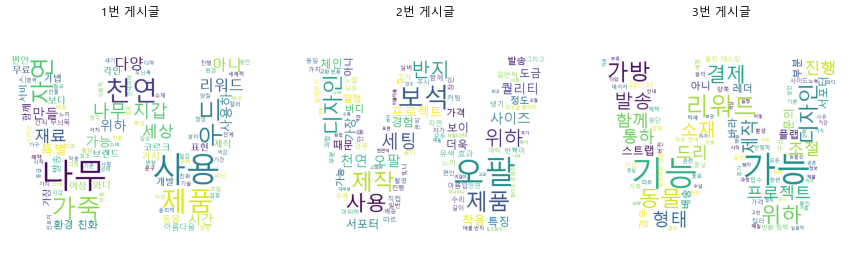

In [82]:
# wadiz의 모양으로 wordcloud 표현해보기
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

ax1.imshow(WC0)
ax1.axis('off')

ax2.imshow(WC1)
ax2.axis('off')

ax3.imshow(WC2)
ax3.axis('off')
ax1.set_title('1번 게시글')
ax2.set_title('2번 게시글')
ax3.set_title('3번 게시글')

plt.show()